# Task # 5 - To explore Business Analytics


Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’. You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the data? You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel)
Dataset:
https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
df=pd.read_csv('Downloads/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.isnull().sum() #Checking for missing values/Null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
df=df.drop(['Country','Postal Code'],axis=1) #droping all the coulmns not requried for analysis.

In [5]:
df.describe() #checking for numerical and categorical coulmns

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df1 =df.corr()
df1

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


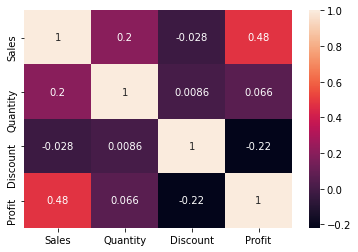

In [7]:
sns.heatmap(df1,annot=True) #correlation

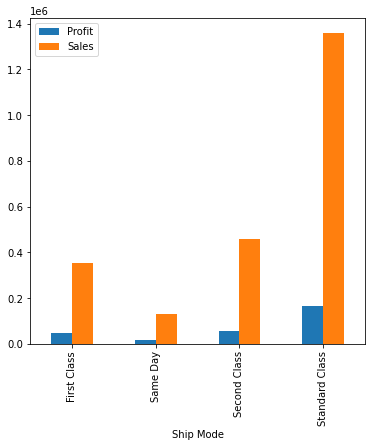

In [8]:
df.groupby('Ship Mode').sum()[['Profit','Sales']].plot.bar(figsize=(6,6))
#plt.bar()

Same day is worse affected.

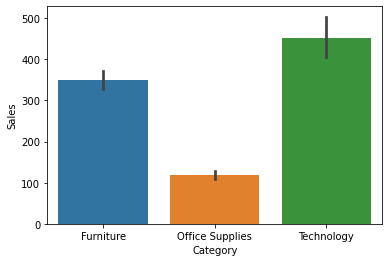

In [9]:
sns.barplot(df['Category'],df['Sales'])

From the graph it is visible that sales in the field of technology is highest and Office supplies is the lowest

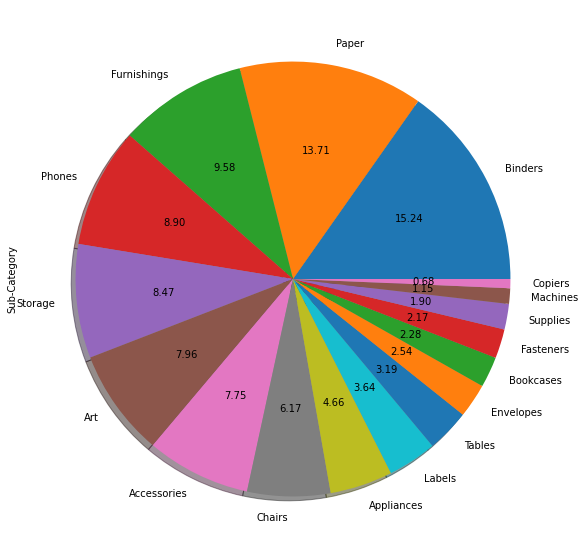

In [10]:
fig,ax= plt.subplots(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct = '%.2f',shadow = True) #the overall count for sub-categories

From the pie chart it is visible that Papers and binders are the highest.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

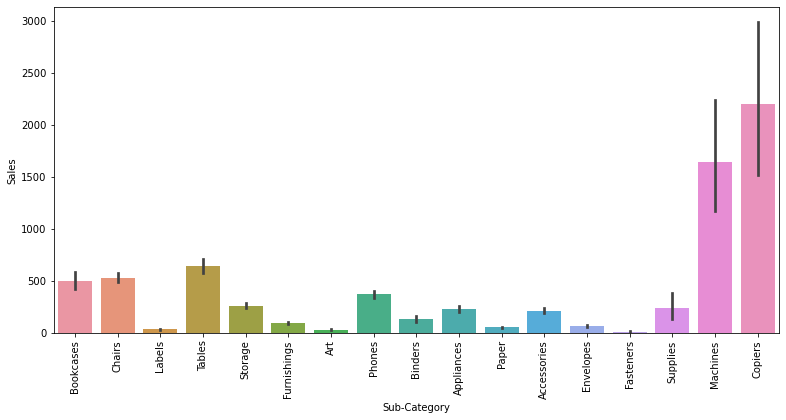

In [11]:
fig= plt.figure(figsize=(13,6))
sns.barplot(df['Sub-Category'],df['Sales'])
plt.xticks(rotation= 90)


From the above bar graph it is visible that copiers has the highest sales followed by machines.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

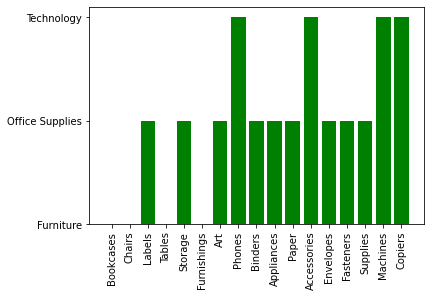

In [12]:
fig= plt.gcf()
plt.bar('Sub-Category', 'Category',data = df,facecolor = 'g')
plt.xticks(rotation =90 )

From the above bar graph it is understood that the copiers and machines fall into the technologies which have the highest sales and the least sales falls in furniture category i.e. Bookcases,Tables and furnishings.

<ipython-input-16-7c7aa9484d03>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=df.groupby(df['Sub-Category'])['Profit','Sales'].sum().sort_values(by=['Profit','Sales'],ascending = False).plot.bar(color=['#aaff00','#a64dff'])


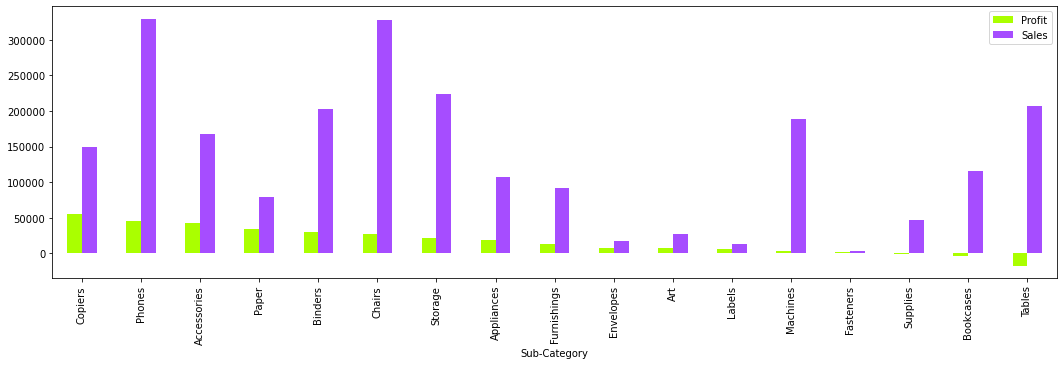

In [16]:

plt.rcParams["figure.figsize"] = (18,5)
df2=df.groupby(df['Sub-Category'])['Profit','Sales'].sum().sort_values(by=['Profit','Sales'],ascending = False).plot.bar(color=['#aaff00','#a64dff'])


Technologies has the highest profit and furniture has the lowest profit

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

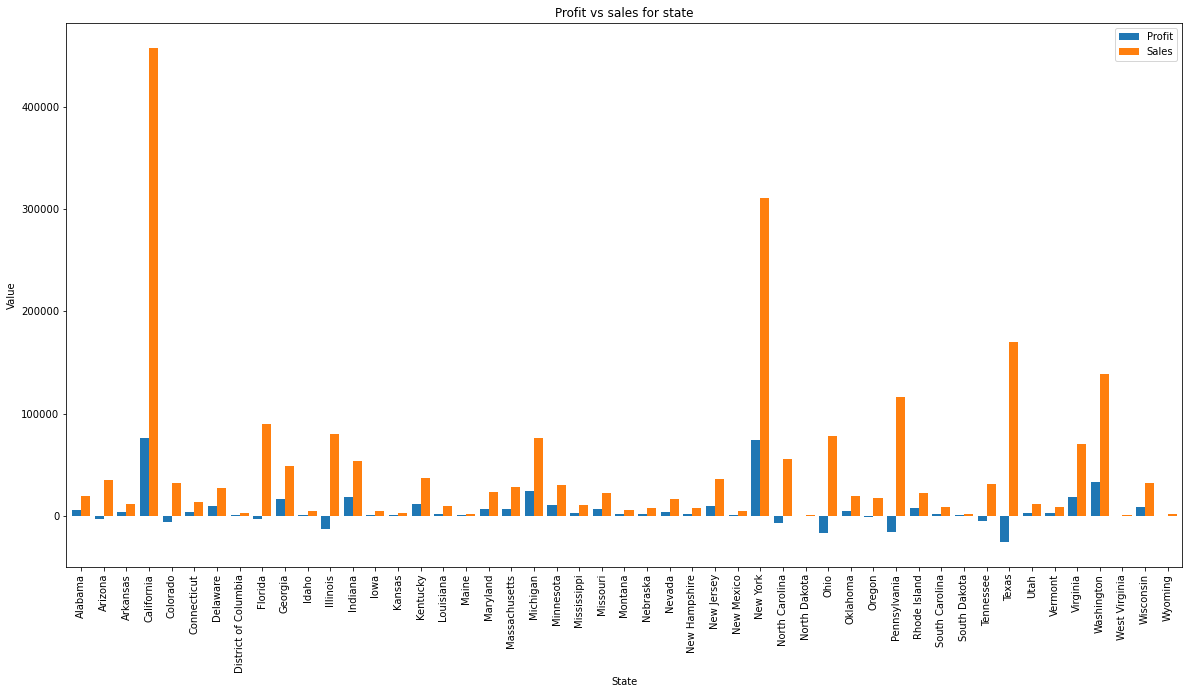

In [20]:
fig,ax=plt.subplots()
x=np.arange(len(df['State']))
df2 =df.groupby(['State']).sum()[['Profit','Sales']].plot.bar(ax=ax,legend=True,figsize=(20,10),width=0.8)
plt.title('Profit vs sales for state')
plt.xlabel("State")
plt.ylabel('Value')
plt.xticks(rotation=90)


In [21]:
print(df.groupby(['State']).sum()[['Profit','Sales']].sort_values(by=["Profit"],ascending=True))

                          Profit        Sales
State                                        
Texas                -25729.3563  170188.0458
Ohio                 -16971.3766   78258.1360
Pennsylvania         -15559.9603  116511.9140
Illinois             -12607.8870   80166.1010
North Carolina        -7490.9122   55603.1640
Colorado              -6527.8579   32108.1180
Tennessee             -5341.6936   30661.8730
Arizona               -3427.9246   35282.0010
Florida               -3399.3017   89473.7080
Oregon                -1190.4705   17431.1500
Wyoming                 100.1960    1603.1360
West Virginia           185.9216    1209.8240
North Dakota            230.1497     919.9100
South Dakota            394.8283    1315.5600
Maine                   454.4862    1270.5300
Idaho                   826.7231    4382.4860
Kansas                  836.4435    2914.3100
District of Columbia   1059.5893    2865.0200
New Mexico             1157.1161    4783.5220
Iowa                   1183.8119  

California has the highest sales and profit followed by New York.Whereas,Texas with almost average sales has the lowest profit. 

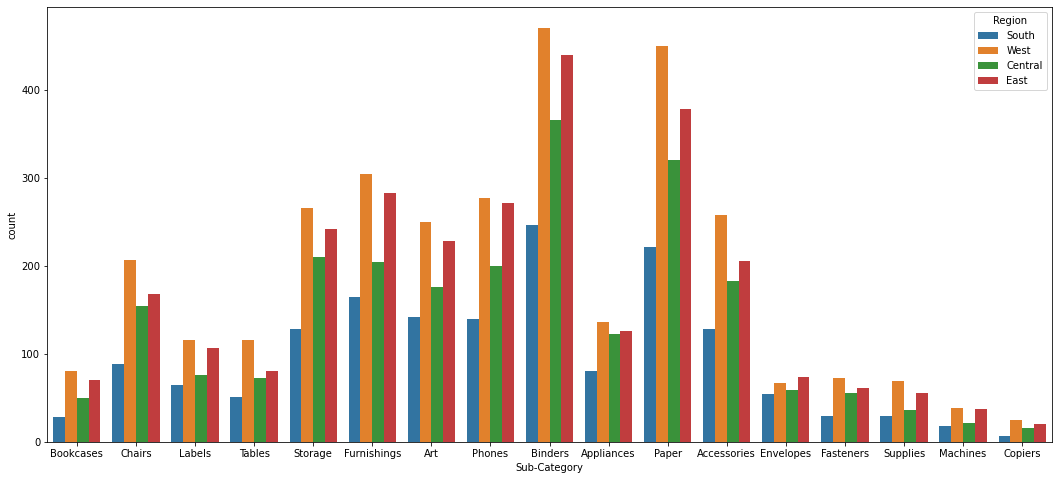

In [22]:
plt.figure(figsize=(18,8))

sns.countplot(x="Sub-Category", hue="Region", data=df)

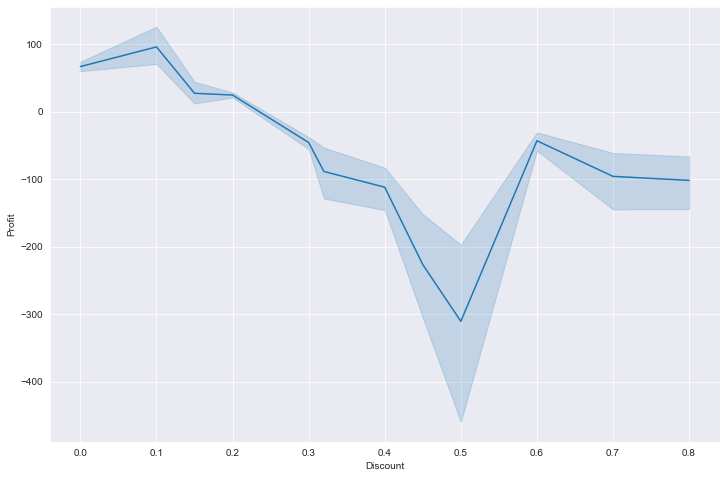

In [23]:
fig=plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.lineplot(df['Discount'],df['Profit'])

Text(0.5, 1.0, 'City with lowest profit')

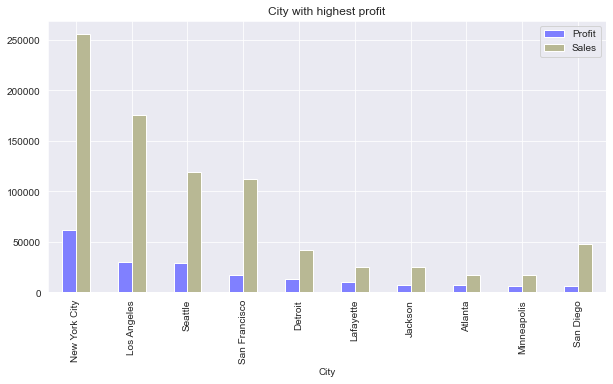

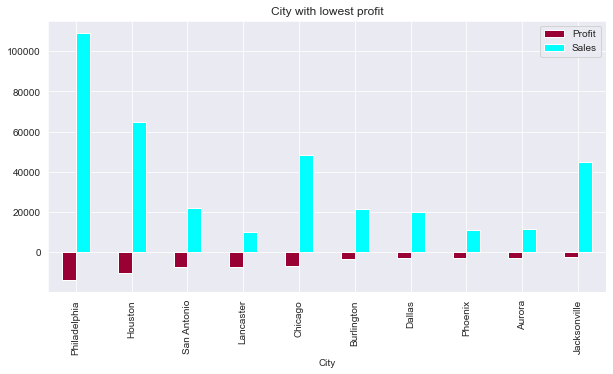

In [24]:
df.groupby(['City']).sum()[['Profit','Sales']].sort_values(by=["Profit"],ascending=False).head(10).plot.bar(figsize=(10,5),color=['#8080ff','#b8b894'])
plt.title('City with highest profit')

df.groupby(['City']).sum()[['Profit','Sales']].sort_values(by=["Profit"],ascending=True).head(10).plot.bar(figsize=(10,5),color= ['#990033','Cyan'])
plt.title('City with lowest profit')


From the above city graph it is visible that Philadelphia generated least profit,whereas New York city generated the highest.

              Profit        Sales  GrossProfit
Region                                        
Central   39706.3625  501239.8908     7.921629
East      91522.7800  678781.2400    13.483399
South     46749.4303  391721.9050    11.934342
West     108418.4489  725457.8245    14.944831


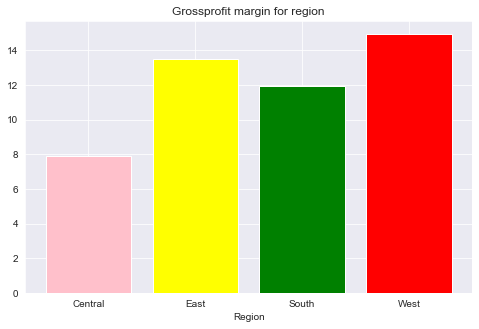

In [25]:
fig=plt.gcf().set_size_inches(8,5)
df3=df.groupby('Region').sum()[['Profit','Sales']]
df3['GrossProfit']= (df3['Profit']/df3['Sales'])*100
plt.bar(df3.index.values,df3['GrossProfit'],color=['Pink','Yellow','Green','red'])
plt.xlabel('Region')
plt.title('Grossprofit margin for region')
print(df3)

Gross Profit Margin is highest in the west region with 14% whereas central ranks  last with a margin of 7%

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

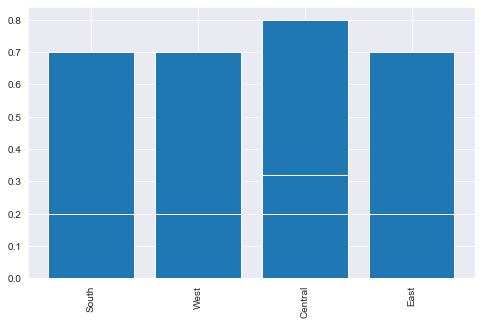

In [27]:
fig = plt.figure(figsize=(8,5))
plt.bar(df['Region'],df['Discount'],data=df)
plt.xticks(rotation =90)


Highest discount was provided to Central however it ranks the lowest in= creating profit. So the company should reduce discounts on productsin Central region.